In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import math

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost_framework import * 

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

7094


In [2]:
def addReadinessLag_rework(df, lag):
    target = 'readiness_t+'+str(lag)

    df[target] = df['readiness'].shift(-lag)

    #df["Total_distance"] = df['Total_distance'].shift(1)
    #df["Average_running_speed"] = df['Average_running_speed'].shift(1)
    #df["Top_speed"] = df['Top_speed'].shift(1)
    #df["HIR"] = df['HIR'].shift(1)

    df.dropna(inplace=True)

    return df

In [3]:
columnNames = ["daily_load", "fatigue", "mood", "sleep_duration", "sleep_quality", "soreness", "injury_ts", "stress", "Total_distance", "Average_running_speed", "Top_speed", "HIR", "day", "month","readiness","readiness_t+1"]
df = createDataset()
df = addReadinessLag_rework(df, 1)
df = addReadinessLag_rework(df, 2)
df = addReadinessLag_rework(df, 3)
#df = to_sessions(df)
df_A = df.loc[df['Team_name'] == "TeamA"]
df_B = df.loc[df['Team_name'] == "TeamB"]

players = list(df['player_name_x'].unique())
playersA = list(df_A['player_name_x'].unique())
playersB = list(df_B['player_name_x'].unique())

print(len(playersA))
print(len(playersB))
print(len(df))
print(len(df_A))
print(len(df_B))

25
20
17823
10743
7080


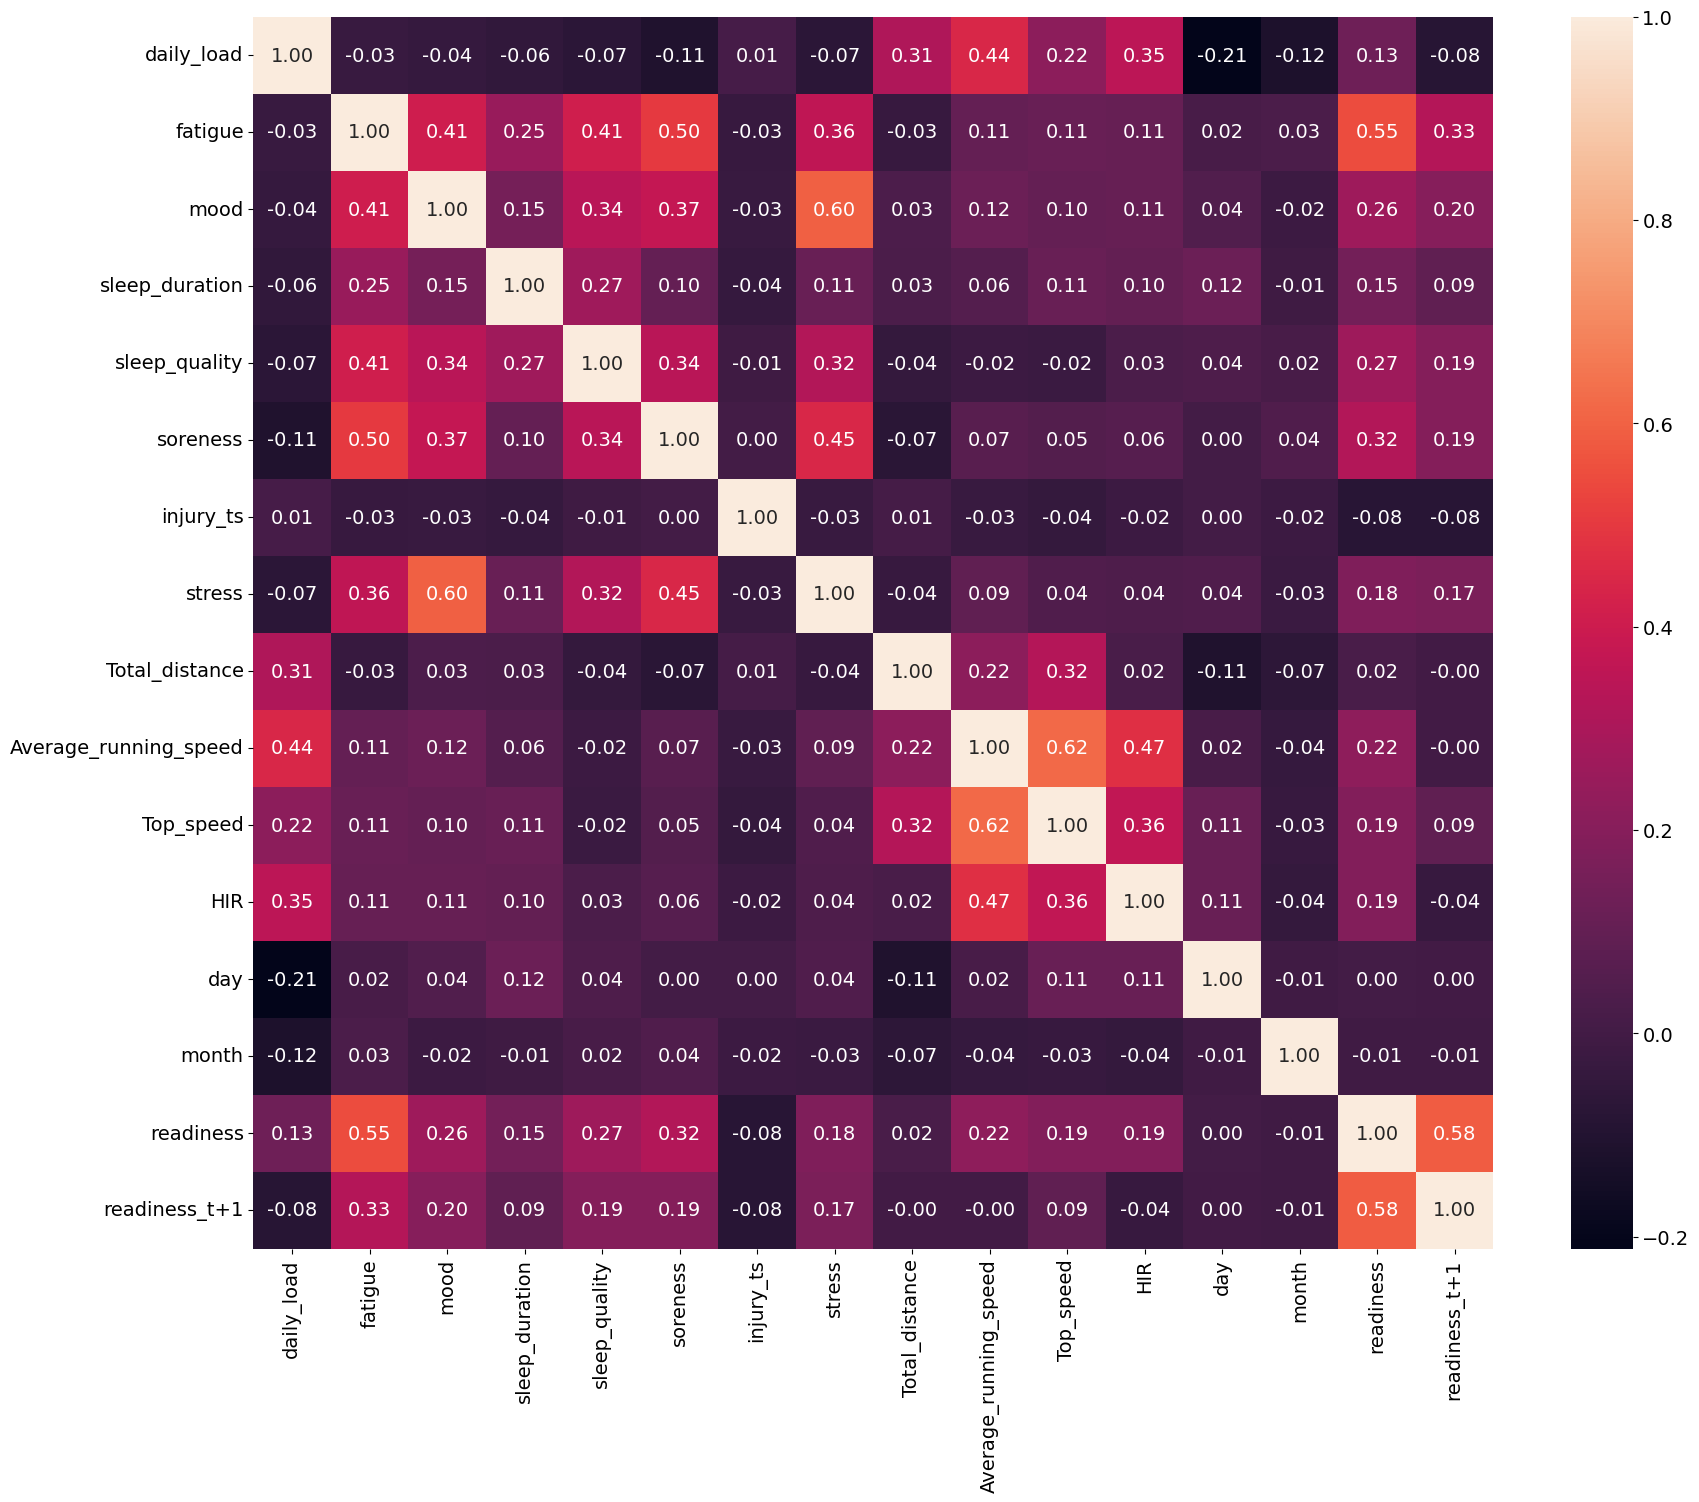

In [4]:
font = {'size'   : 14}
plt.rc('font', **font)
df_A_corr = df_A[columnNames]
f = plt.figure(figsize=(20, 16))
correlation_mat = df_A_corr.corr()
sns.heatmap(correlation_mat, annot = True, fmt='.2f')
plt.show()

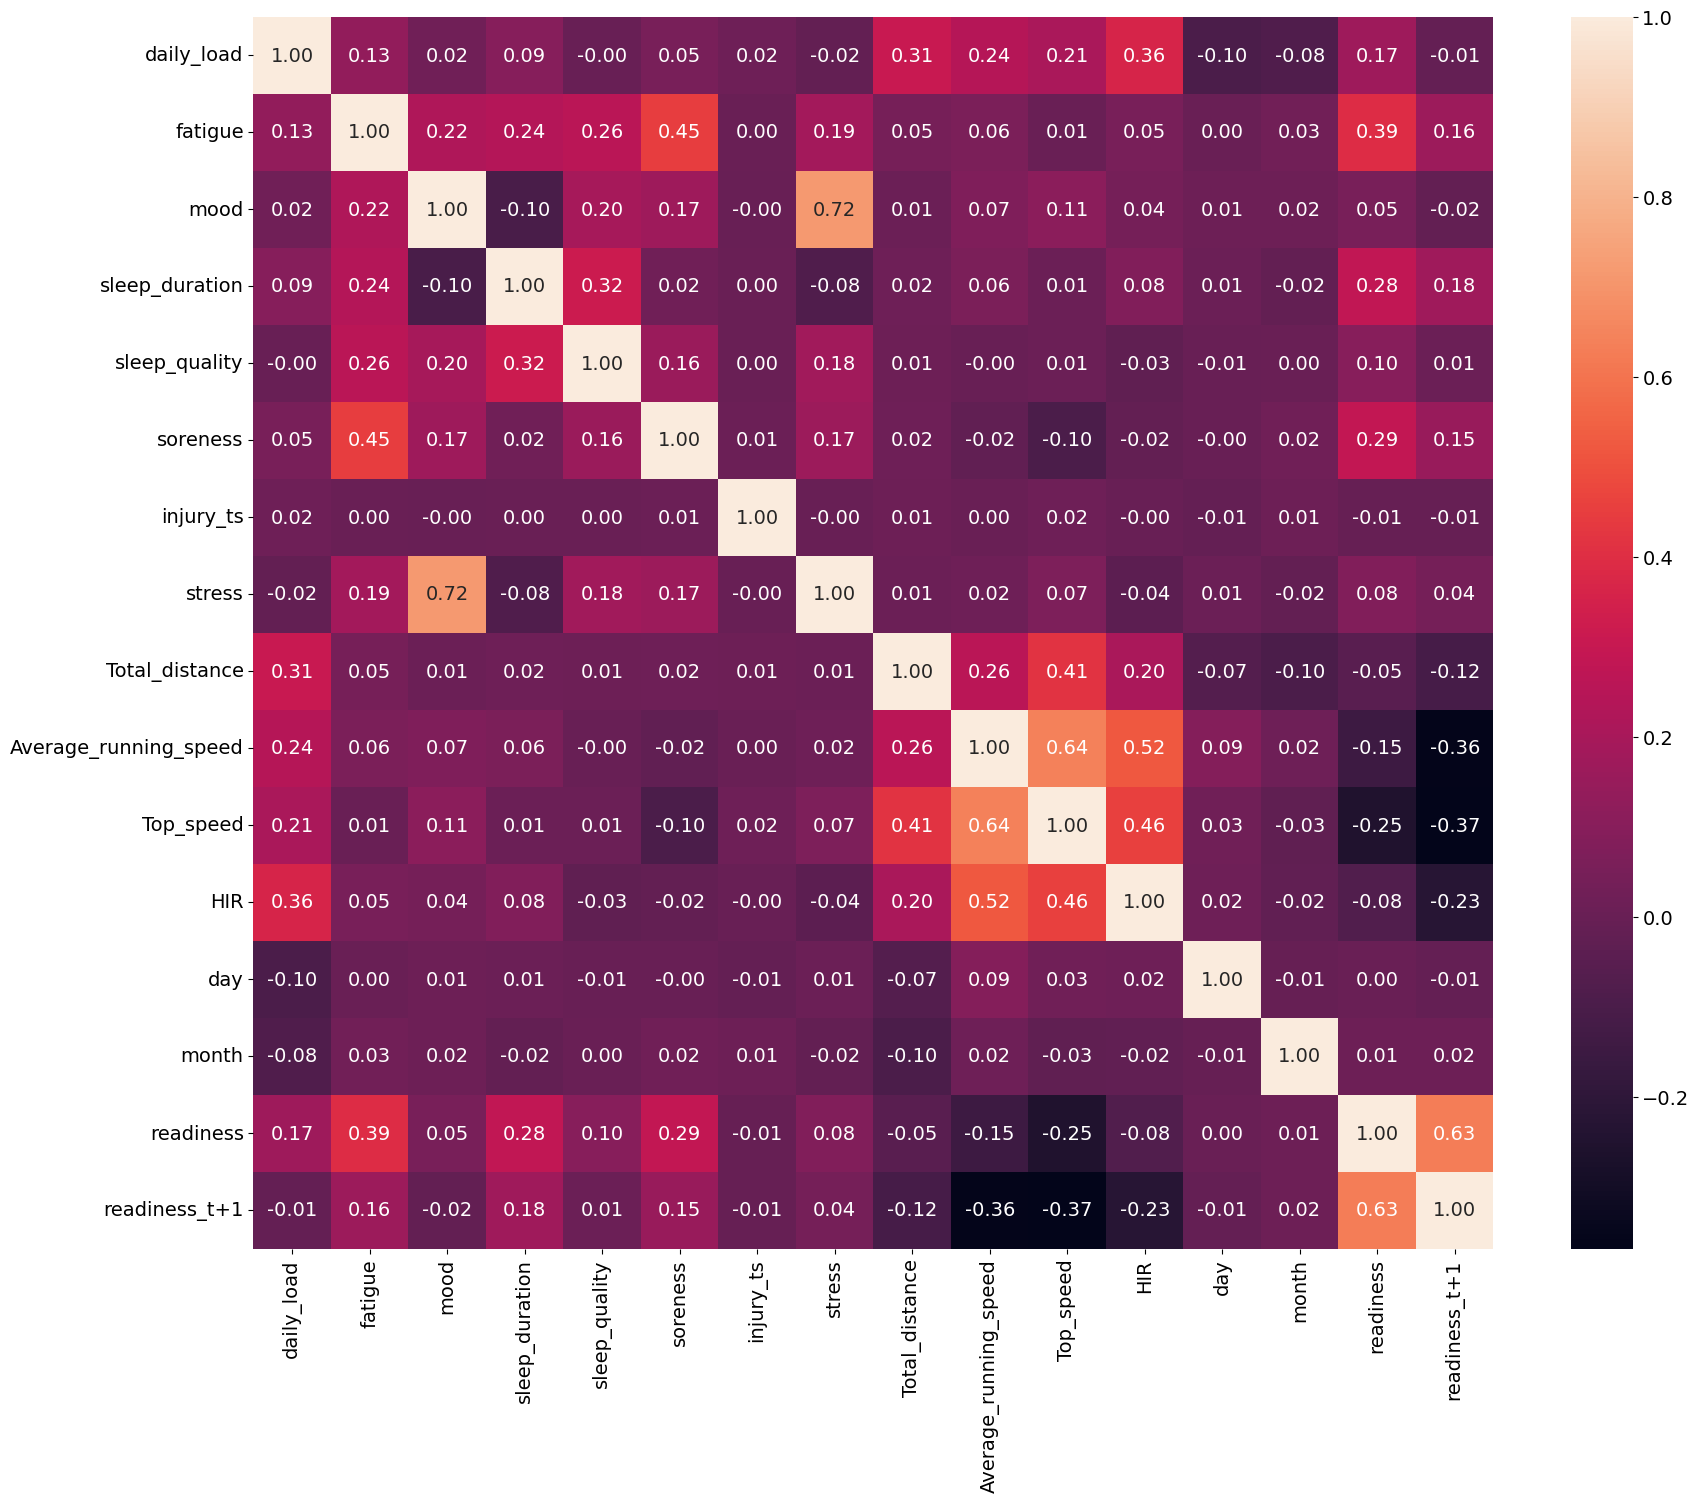

In [5]:
df_A_corr = df_B[columnNames]
f = plt.figure(figsize=(20, 16))
correlation_mat = df_A_corr.corr()
sns.heatmap(correlation_mat, annot = True, fmt='.2f')
plt.show()

In [6]:
df_window = pd.read_pickle("BASELINE_results/data/Inputwindow-LSTM-Team-A")
df_window

,Output window = 1,Output window = 3,Output window = 7,Output window = 14
0,0.978884,1.074072,1.148163,1.164137
1,0.920186,1.036847,1.084714,1.128074
2,0.883320,1.007754,1.079759,1.137396
3,0.883542,0.992664,1.087772,1.116207
4,0.882624,0.995714,1.081435,1.109873
5,0.877586,1.000061,1.075500,1.118258
6,0.872038,1.023429,1.096444,1.135923
7,0.873074,1.032033,1.078610,1.106692
8,0.881410,1.031841,1.089540,1.103734
9,0.881083,1.028285,1.086965,1.114728


In [7]:
df = createDataset()
players = list(df['player_name_x'].unique())
sum1 = 0
for i in range(len(players)):
    sum1 += len(df.loc[df['player_name_x'] == players[i]])
print(i)
print(sum1/len(players))

44
396.2


199


C:\Users\Sagba\AppData\Local\Temp\ipykernel_21592\3515859929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_player["actual"][df_A_player['date'].isin(actual_dates)]= 1
C:\Users\Sagba\AppData\Local\Temp\ipykernel_21592\3515859929.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["actual"][df_['date'].isin(actual_dates)]=1


count    533.000000
mean       0.373358
std        0.484150
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: actual, dtype: float64

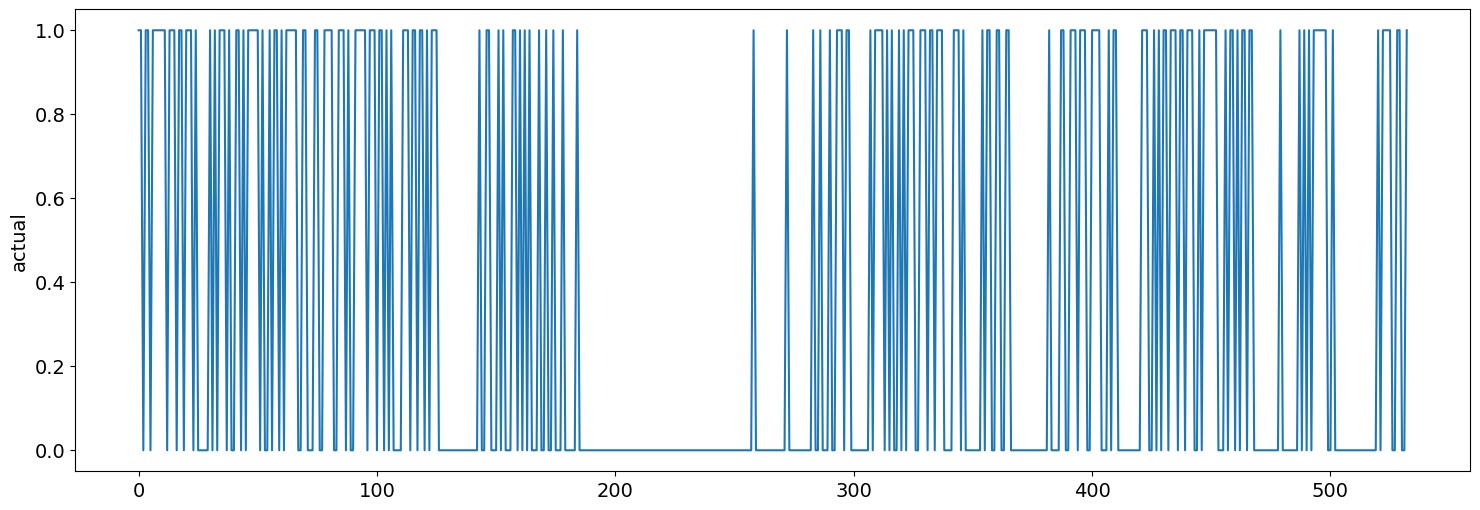

In [8]:
import matplotlib as mpl
plt.figure(figsize=(18, 6))
mpl.rcParams['figure.dpi'] = 400
df_ = createDataset()
players = list(df_['player_name_x'].unique())
df_dates = to_sessions(df_)
df_A_player_dates = df_dates.loc[df_dates['player_name_x'] == players[24]].reset_index(drop=True)
actual_dates = list(df_A_player_dates["date"])
print(len(actual_dates))
df_A = df.loc[df_['Team_name'] == "TeamA"]
df_B = df.loc[df_['Team_name'] == "TeamB"]

df_A_player = df_.loc[df_['player_name_x'] == players[24]].reset_index(drop=True)

df_A_player["actual"] = 0
df_A_player["actual"][df_A_player['date'].isin(actual_dates)]= 1

df_["actual"] = 0
df_["actual"][df_['date'].isin(actual_dates)]=1


#df_A_player["actual"].plot()

ax = sns.lineplot(data=df_A_player["actual"], dashes=False)
#ax.set_xlabel("Dates",fontsize=10)
#ax.set_ylabel("Readiness",fontsize=10)
#ax.set_xticklabels(df_A_player["date"])
#ax.tick_params(labelsize=8)
#df_A_player
df_A_player["actual"].describe()

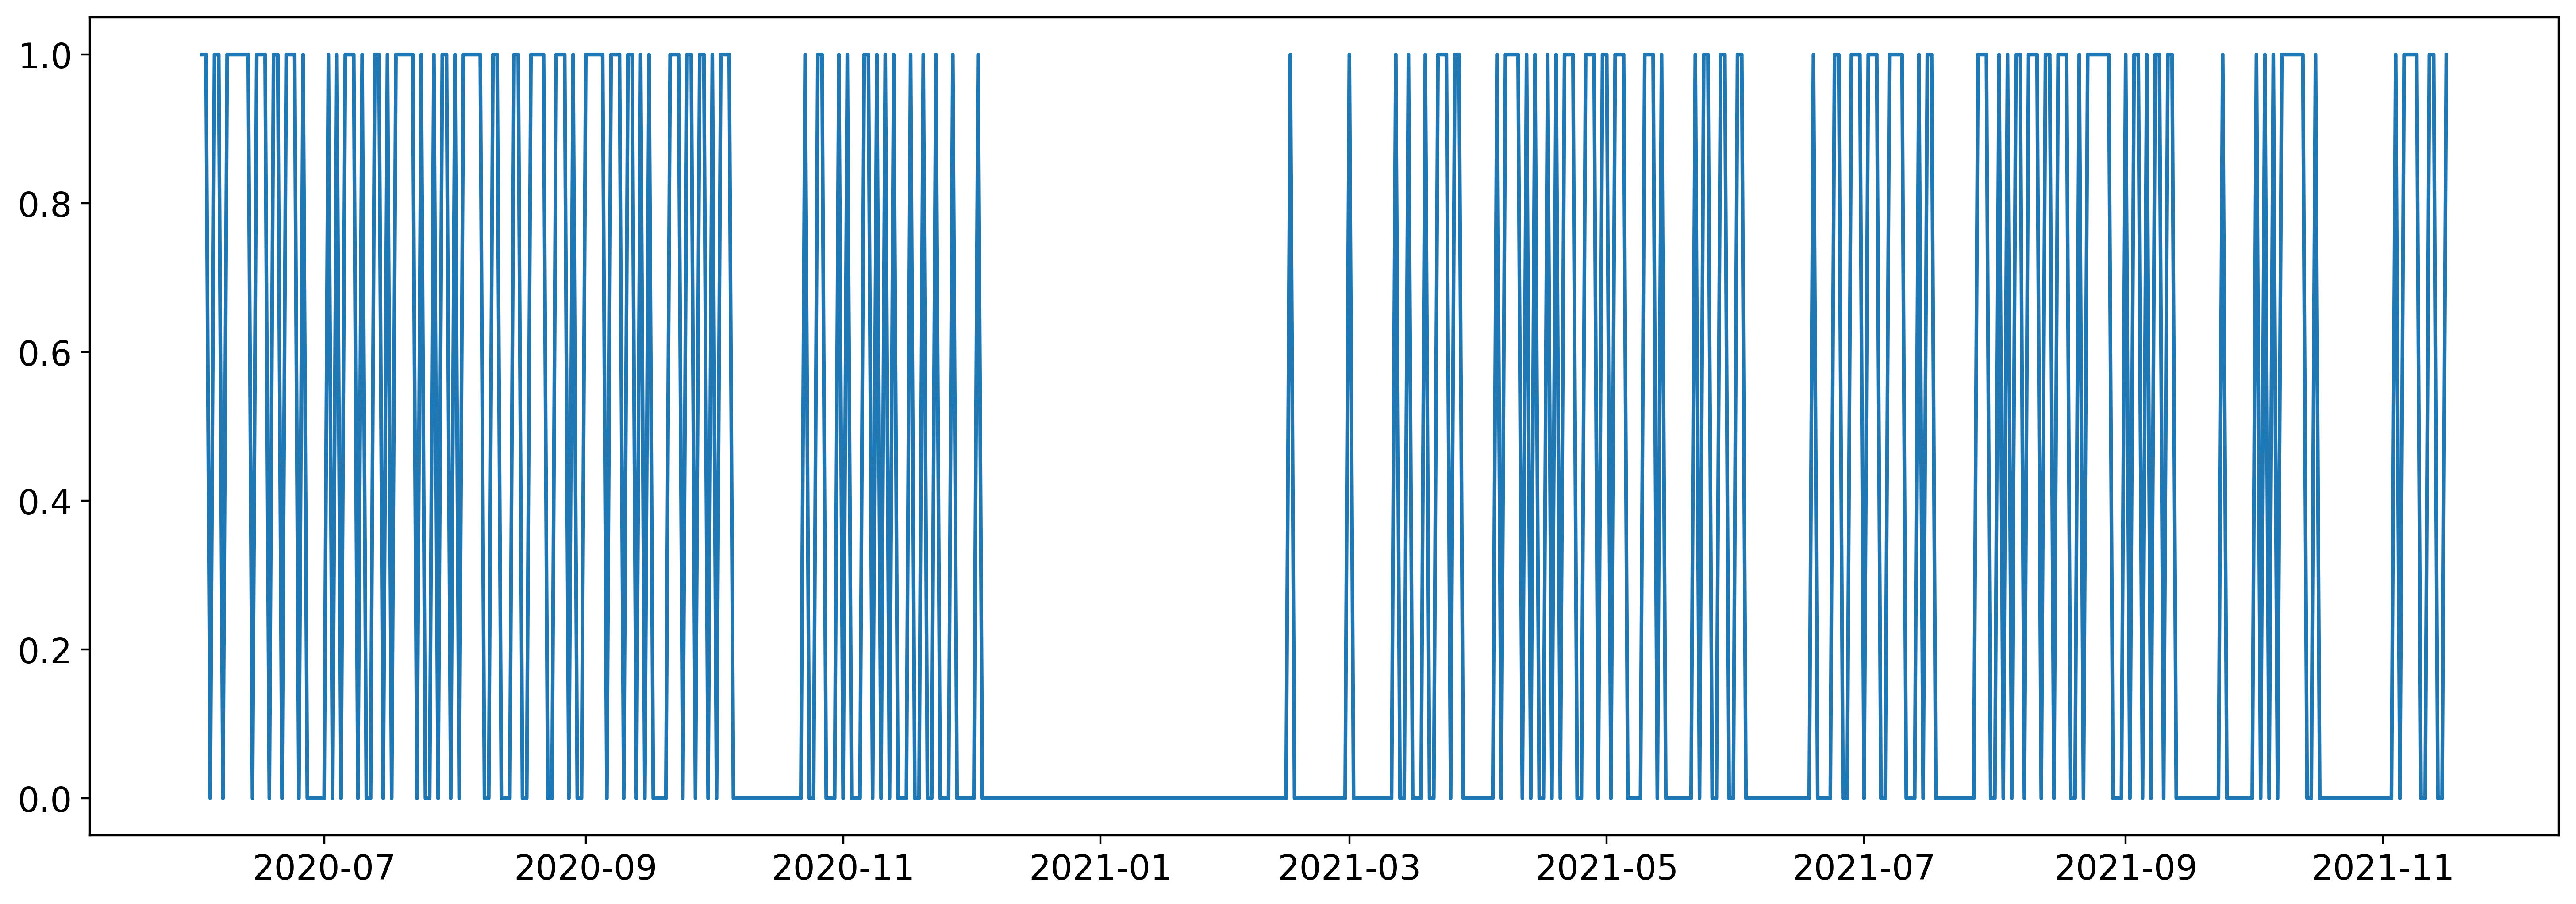

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(18, 6))
mpl.rcParams['figure.dpi'] = 300


plt.plot(df_A_player["date"], df_A_player["actual"])
# start by your date and then your data
ax.plot(df_A_player['date'],df_A_player["actual"]) # daily data
# You can change the step of range() as you prefer (now, it selects each third month) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3)))
# you can change the format of the label (now it is 2016-Jan)  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [10]:
from itertools import groupby
from statistics import mean, median
import itertools
list1 = list(df_A_player["actual"])
print(list1)
count_dups = [sum(1 for _ in group) for _, group in groupby(list1)]
count_dups = count_dups[1::2]
print(count_dups)
print("Mean:",mean(count_dups))

results = {'dups': count_dups}
results = pd.DataFrame(results)

clusters = results[results.dups > 6]
not_clusters = results[results.dups < 7]

results.describe()

print(sum(not_clusters["dups"]))
print(sum(clusters["dups"]))
clusters

[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 

,dups
33,17
46,73
47,13
48,10
53,8
65,7
69,16
76,10
90,11
91,7


In [11]:
varA = df_A["readiness"].std()
varB = df_B["readiness"].std()

print("Team A mean: ",df_A["readiness"].mean())
print("Team B mean: ",df_B["readiness"].mean())
print("")
print("Team A median: ",df_A["readiness"].median())
print("Team B median: ",df_B["readiness"].median())
print("")
print("Standard deviation of Team A: ",varA," Standard deviation of Team B: ",varB)
print("")
print("Team A variance: ",df_A["readiness"].var())
print("Team B variance: ",df_B["readiness"].var())

Team A mean:  6.781625244345155
Team B mean:  6.912221281399944

Team A median:  7.0
Team B median:  7.0

Standard deviation of Team A:  1.363530525056385  Standard deviation of Team B:  1.128535478854465

Team A variance:  1.8592154927605409
Team B variance:  1.2735923270332767


In [12]:
distributionA = (df_A['readiness'].value_counts(normalize=True)*100).sort_index(ascending=True).round(decimals=2)
idx = list(distributionA.index)
distributionA = pd.DataFrame(data = list(distributionA), columns=["readiness"])
distributionA["idx"] = idx

distributionB = (df_B['readiness'].value_counts(normalize=True)*100).sort_index(ascending=True).round(decimals=2)
idx = list(distributionB.index)
distributionB = pd.DataFrame(data = list(distributionB), columns=["readiness"])
distributionB["idx"] = idx

peaks_low_A =  round(distributionA.loc[distributionA['idx'] < 5]["readiness"].sum(), 2)
peaks_neutral_A =  round(distributionA.loc[(distributionA['idx'] >= 5) & (distributionA['idx'] <= 7)]["readiness"].sum(), 2)
peaks_high_A =  round(distributionA.loc[distributionA['idx'] > 7]["readiness"].sum(), 2)
peaks_low_B =  round(distributionB.loc[distributionB['idx'] < 5]["readiness"].sum(), 2)
peaks_neutral_B =  round(distributionB.loc[(distributionB['idx'] >= 5) & (distributionB['idx'] <= 7)]["readiness"].sum(), 2)
peaks_high_B = round(distributionB.loc[distributionB['idx'] > 7]["readiness"].sum(), 2)

print("Percentage of readiness values four and below (Team A): ",peaks_low_A," Percentage of readiness values four and below (Team B): ",peaks_low_B)
print("Percentage of readiness values between five and seven (Team A): ",peaks_neutral_A," Percentage of readiness values between five and seven (Team B): ",peaks_neutral_B)
print("Percentage of readiness values eight and higher (Team A): ",peaks_high_A," Percentage of readiness values eight and higher (Team B): ",peaks_high_B)

Percentage of readiness values four and below (Team A):  5.09  Percentage of readiness values four and below (Team B):  1.4
Percentage of readiness values between five and seven (Team A):  68.41  Percentage of readiness values between five and seven (Team B):  67.62
Percentage of readiness values eight and higher (Team A):  26.5  Percentage of readiness values eight and higher (Team B):  30.98


In [13]:
print("Team A mean: ",df_A["readiness"].mean())
print("Team B mean: ",df_B["readiness"].mean())
print("")
print("Team A mean: ",df_A["readiness"].median())
print("Team B mean: ",df_B["readiness"].median())

Team A mean:  6.781625244345155
Team B mean:  6.912221281399944

Team A mean:  7.0
Team B mean:  7.0


In [26]:
df_all_features = pd.read_pickle("BASELINE_results/data/boxplots_config16RMSE-SCORES-FOR-CONFIG-All-Features--1-out--team A--Sessions")
df_only_readiness = pd.read_pickle("BASELINE_results/data/boxplots_config17RMSE-SCORES-FOR-CONFIG-Only-Readiness--1-out--team A--Sessions")
df_difference = df_only_readiness-df_all_features
df_difference = df_difference.rename(columns={'XGB: RMSE': 'xgb', 'Lin: RMSE': 'lin', 'LSTM: RMSE': 'lstm', 'TFT: RMSE': 'tft', 'Tree: RMSE': 'tree'})
df_all_features = df_all_features.rename(columns={'XGB: RMSE': 'xgb_m', 'Lin: RMSE': 'lin_m', 'LSTM: RMSE': 'lstm_m', 'TFT: RMSE': 'tft_m', 'Tree: RMSE': 'tree_m'})
df_only_readiness = df_only_readiness.rename(columns={'XGB: RMSE': 'xgb_u', 'Lin: RMSE': 'lin_u', 'LSTM: RMSE': 'lstm_u', 'TFT: RMSE': 'tft_u', 'Tree: RMSE': 'tree_u'})

#df_difference = df_only_readiness-df_all_features

df_combined = pd.DataFrame()
df_combined[list(df_only_readiness.columns)] = df_only_readiness[list(df_only_readiness.columns)]
df_combined[list(df_all_features.columns)] = df_all_features[list(df_all_features.columns)]

var = []
for i in range(len(playersA)):
    var.append((df_A.loc[df_A['player_name_x'] == playersA[i]].reset_index(drop=True))["readiness"].var())
var = var+[0,0,0,0,0]

df_difference["variance"] = var
df_all_features["var"] = var

df_combined['xgb_diff'] = ((df_combined[['xgb_m', 'xgb_u']].pct_change(axis=1)['xgb_u']) * 100).round(1).map(str) + "%"
df_combined['lin_diff'] = ((df_combined[['lin_m', 'lin_u']].pct_change(axis=1)['lin_u']) * 100).round(1).map(str) + "%"
df_combined['tree_diff'] = ((df_combined[['tree_m', 'tree_u']].pct_change(axis=1)['tree_u']) * 100).round(1).map(str) + "%"
df_combined['lstm_diff'] = ((df_combined[['lstm_m', 'lstm_u']].pct_change(axis=1)['lstm_u']) * 100).round(1).map(str) + "%"
df_combined['tft_diff'] = ((df_combined[['tft_m', 'tft_u']].pct_change(axis=1)['tft_u']) * 100).round(1).map(str) + "%"

print(df_difference.columns)
df_difference
df_combined_ = df_combined[["xgb_diff", "lin_diff", "tree_diff", "lstm_diff", "tft_diff"]][:25]
df_combined_
df_difference 

Index(['xgb', 'lin', 'tree', 'lstm', 'tft', 'variance'], dtype='object')


,xgb,lin,tree,lstm,tft,variance
PLayer1,0.039,0.067,-0.097,0.052,0.015,1.488004
PLayer2,-0.027,-0.047,-0.439,0.021,-0.037,0.889590
PLayer3,0.001,-0.120,-0.526,-0.072,-0.540,0.707324
PLayer4,0.061,0.063,-0.448,-0.126,-1.090,0.830741
PLayer5,-0.021,0.003,-0.180,-0.034,-0.184,1.634218
PLayer6,0.030,0.042,-0.097,0.118,-0.063,0.879234
PLayer7,0.023,-0.047,-0.407,-0.090,-0.207,3.705321
PLayer8,0.002,0.008,-0.384,0.006,-0.052,0.733185
PLayer9,0.016,-0.002,-0.321,0.029,-0.613,0.637266
PLayer10,0.056,0.073,-0.048,0.118,-0.079,0.729079


In [27]:
df_only_readiness

,xgb_u,lin_u,tree_u,lstm_u,tft_u
PLayer1,0.912,0.919,1.191,0.921,0.924
PLayer2,0.722,0.715,1.023,0.736,0.695
PLayer3,0.762,0.754,0.979,0.763,0.768
PLayer4,1.102,0.842,1.342,0.811,1.033
PLayer5,0.709,0.724,1.000,0.716,0.717
PLayer6,1.154,1.202,1.464,1.186,1.142
PLayer7,1.052,1.026,1.095,0.928,0.877
PLayer8,0.781,0.797,1.019,0.806,0.832
PLayer9,0.630,0.647,0.900,0.650,0.643
PLayer10,0.810,0.830,1.080,0.837,0.819


In [28]:
df_all_features

,xgb_m,lin_m,tree_m,lstm_m,tft_m,var
PLayer1,0.873,0.852,1.288,0.869,0.909,1.488004
PLayer2,0.749,0.762,1.462,0.715,0.732,0.889590
PLayer3,0.761,0.874,1.505,0.835,1.308,0.707324
PLayer4,1.041,0.779,1.790,0.937,2.123,0.830741
PLayer5,0.730,0.721,1.180,0.750,0.901,1.634218
PLayer6,1.124,1.160,1.561,1.068,1.205,0.879234
PLayer7,1.029,1.073,1.502,1.018,1.084,3.705321
PLayer8,0.779,0.789,1.403,0.800,0.884,0.733185
PLayer9,0.614,0.649,1.221,0.621,1.256,0.637266
PLayer10,0.754,0.757,1.128,0.719,0.898,0.729079


In [29]:
dummy = pd.read_pickle("BASELINE_results/data/dummy_model_A_first_iteration")
dummy = dummy.rename(columns={'dummy: RMSE': 'dummy'})
dummy["var"] = var
dummy = dummy[:25]
dummy

,dummy,var
0,1.222681,1.488004
1,0.949383,0.889590
2,1.256482,0.707324
3,2.138220,0.830741
4,1.311284,1.634218
5,1.029857,0.879234
6,2.861111,3.705321
7,0.953233,0.733185
8,1.123325,0.637266
9,1.088146,0.729079


In [30]:
from scipy.stats import ttest_ind

t_test = ttest_ind(df_all_features["xgb_m"][:25], dummy["dummy"])

t_test

Ttest_indResult(statistic=-3.470125810362113, pvalue=0.0011096414512186542)

In [19]:
df = createDataset()
df_s = to_sessions(df)

t_test = ttest_ind(df_s["mood"], df["mood"])

t_test


Ttest_indResult(statistic=-1.7360488066287851, pvalue=0.08256756418183334)

In [20]:
df_all_features_ml = pd.read_pickle("BASELINE_results/data/RMSE-SCORES-FOR-CONFIG5-1-out-team-A-all-featuresml")[:25]
df_only_readiness_ml = pd.read_pickle("BASELINE_results/data/RMSE-SCORES-FOR-CONFIG5-1-out-team-A-only-readinessml")[:25]
df_all_features_ml = df_all_features_ml.rename(columns={'XGB: RMSE': 'xgb_m', 'Lin: RMSE': 'lin_m', 'LSTM: RMSE': 'lstm_m', 'TFT: RMSE': 'tft_m', 'Tree: RMSE': 'tree_m'})
df_only_readiness_ml = df_only_readiness_ml.rename(columns={'XGB: RMSE': 'xgb_u', 'Lin: RMSE': 'lin_u', 'LSTM: RMSE': 'lstm_u', 'TFT: RMSE': 'tft_u', 'Tree: RMSE': 'tree_u'})

df_all_features_ml

t_test = ttest_ind(df_all_features_ml["xgb_m"], df_all_features_ml["tft_m"])

t_test

Ttest_indResult(statistic=-1.6042929925091538, pvalue=0.11520989730171043)

In [21]:
good_player = df_A.loc[df_A['player_name_x'] == playersA[0]]
print(501/7)
good_player["date"]

71.57142857142857


0     2020-06-01
1     2020-06-02
2     2020-06-03
3     2020-06-04
4     2020-06-05
         ...    
497   2021-10-11
498   2021-10-12
499   2021-10-13
500   2021-10-14
501   2021-10-15
Name: date, Length: 502, dtype: datetime64[ns]

1.7539051795012333


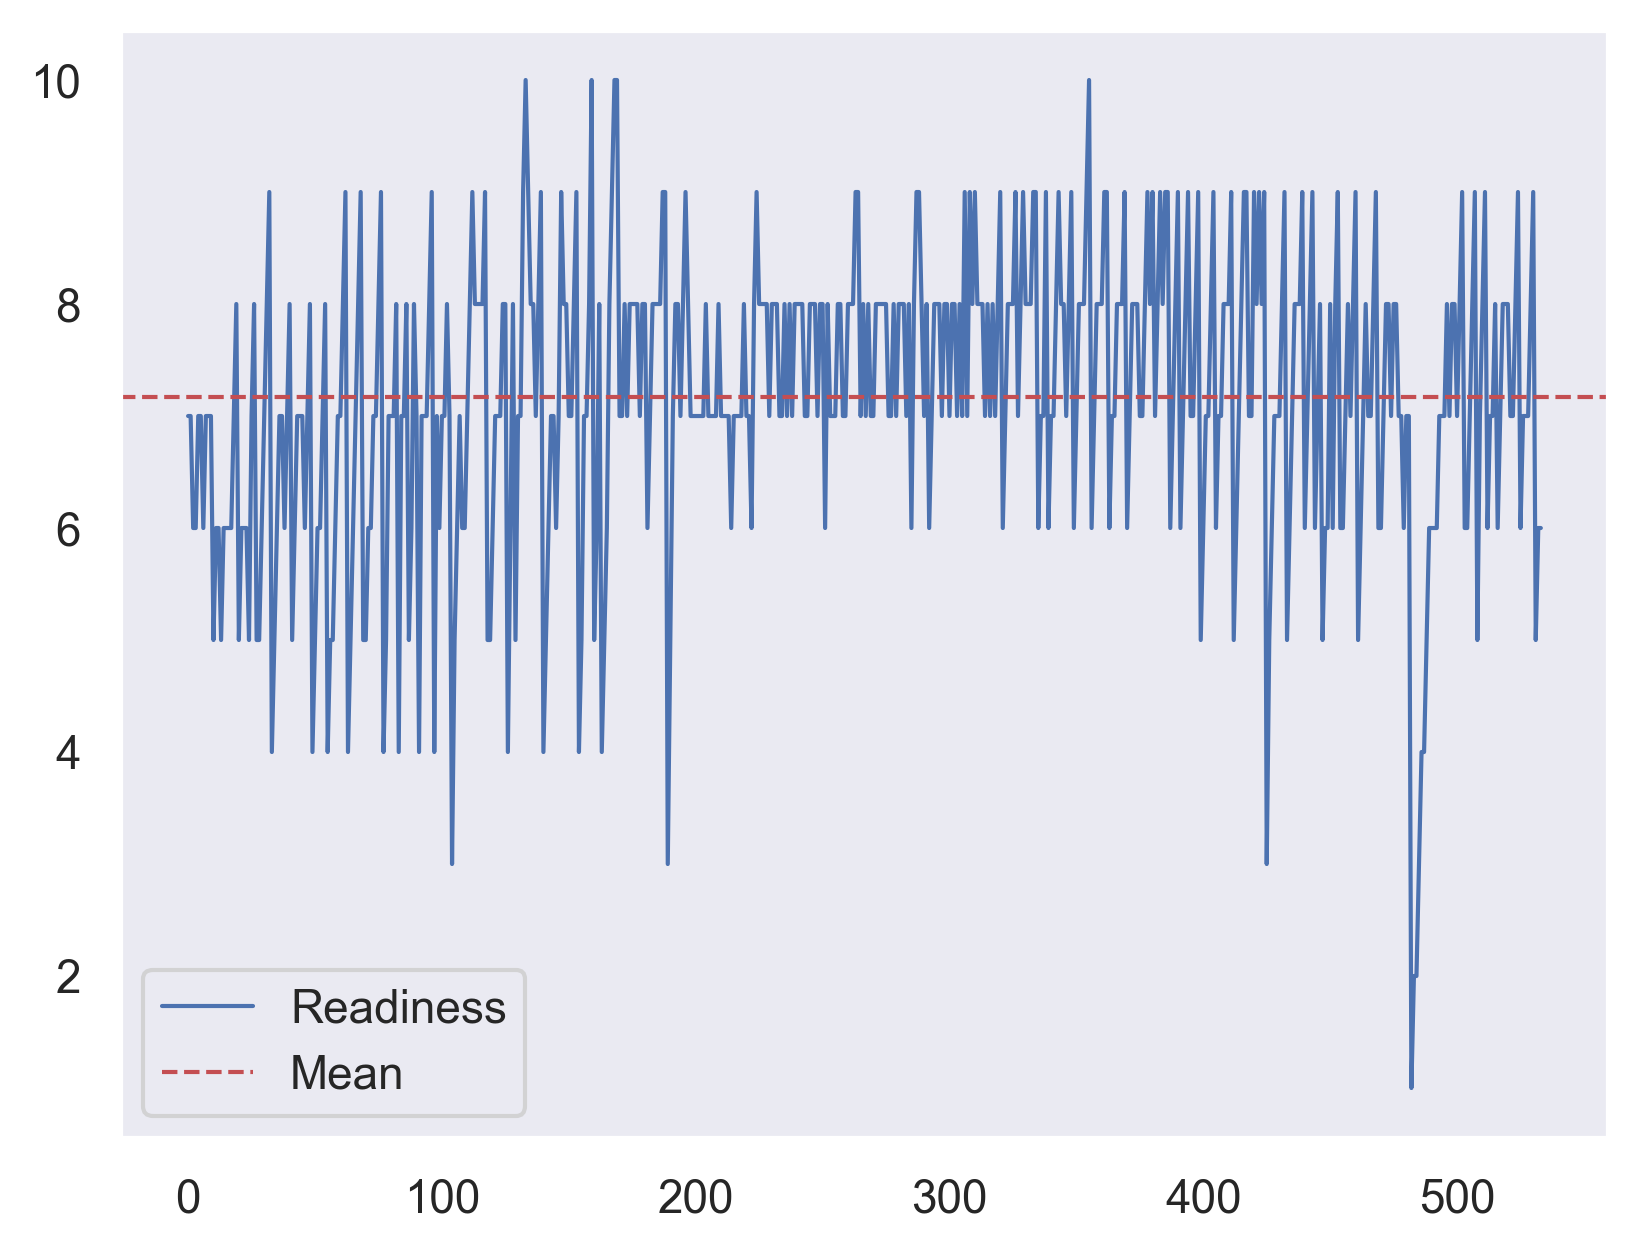

In [22]:
sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")


df_a_test = df_A.loc[df_A['player_name_x'] == playersA[13]].reset_index(drop=True)
mean = df_a_test["readiness"].mean()
print(df_a_test["readiness"].var())

plt.plot(df_a_test.index, df_a_test["readiness"])
plt.axhline(y=mean, color='r', linestyle='--')
plt.legend(["Readiness", "Mean"])

1.4560061919504648


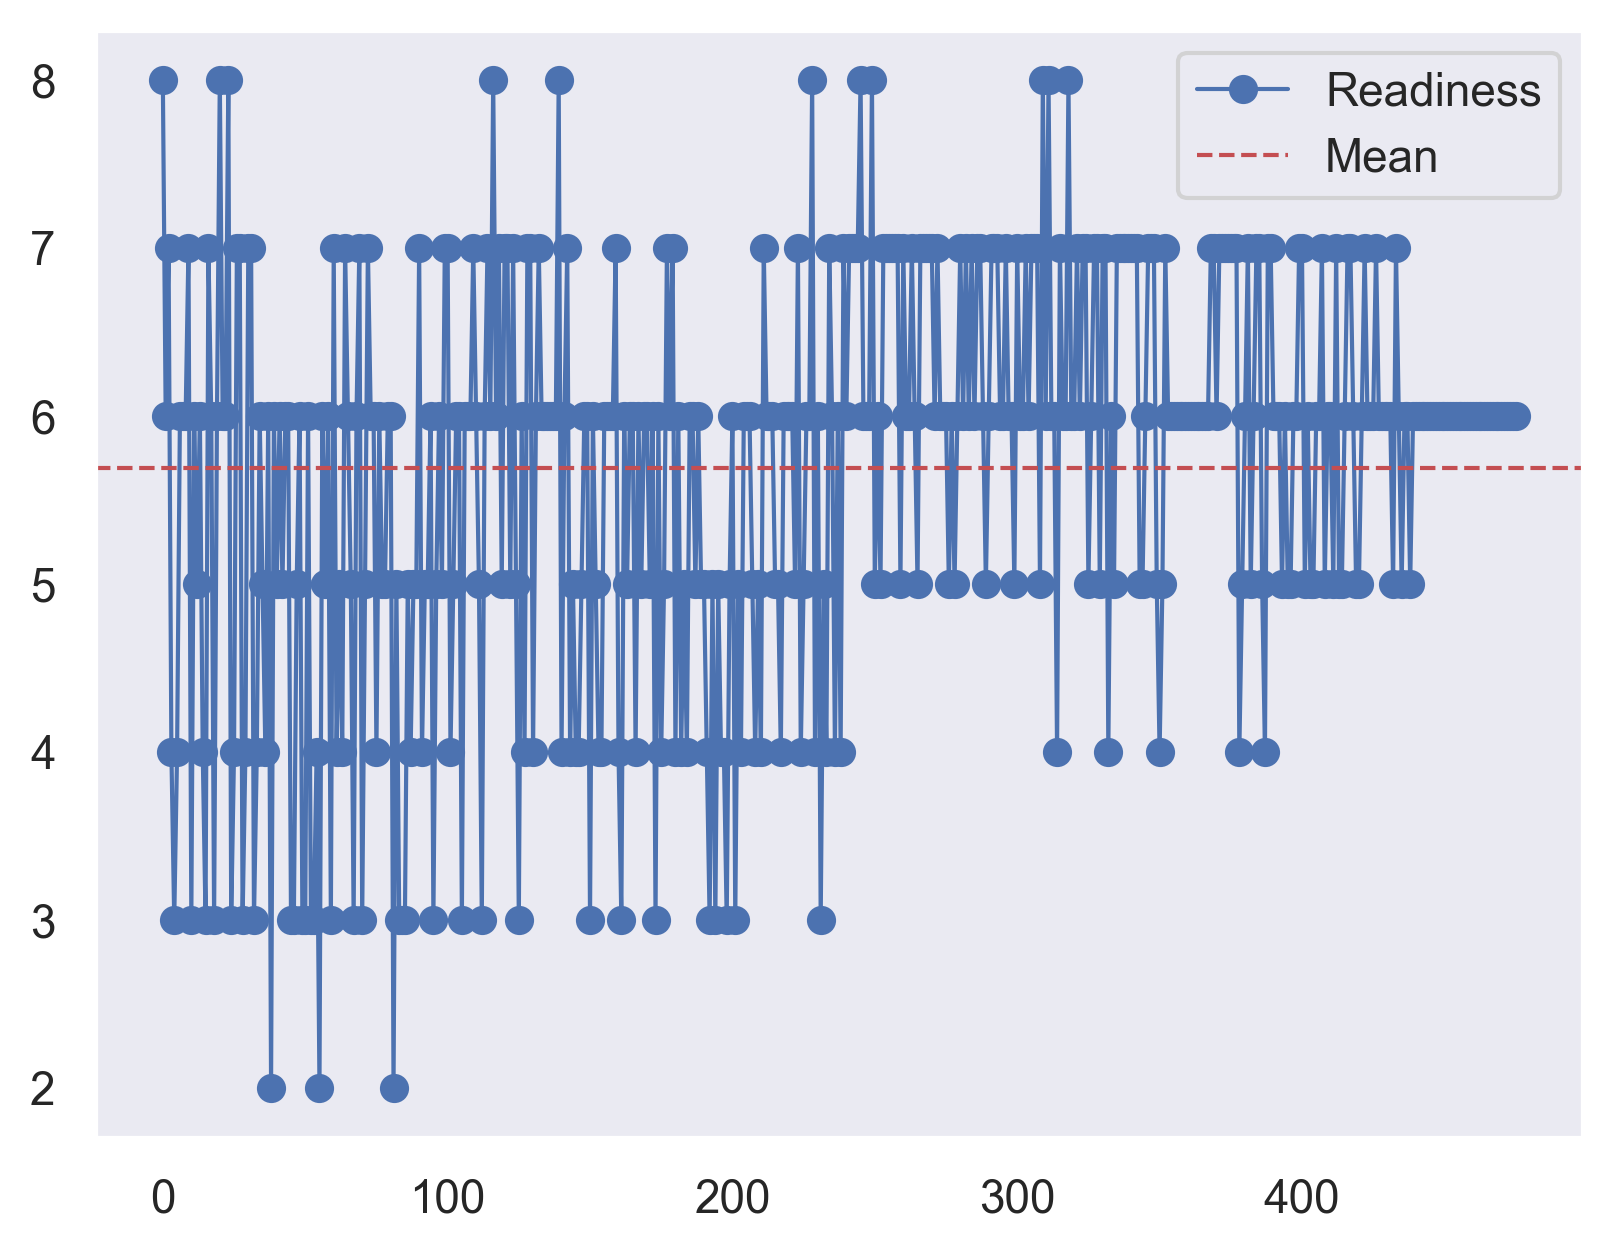

In [23]:
df_a_test = df.loc[df['player_name_x'] == playersA[20]].reset_index(drop=True)
mean = df_a_test["readiness"].mean()
print(df_a_test["readiness"].var())

plt.plot(df_a_test.index, df_a_test["readiness"], marker='o')
plt.axhline(y=mean, color='r', linestyle='--')
plt.legend(["Readiness", "Mean"])


In [34]:
df_all_features[:25]

,xgb_m,lin_m,tree_m,lstm_m,tft_m,var
PLayer1,0.873,0.852,1.288,0.869,0.909,1.488004
PLayer2,0.749,0.762,1.462,0.715,0.732,0.889590
PLayer3,0.761,0.874,1.505,0.835,1.308,0.707324
PLayer4,1.041,0.779,1.790,0.937,2.123,0.830741
PLayer5,0.730,0.721,1.180,0.750,0.901,1.634218
PLayer6,1.124,1.160,1.561,1.068,1.205,0.879234
PLayer7,1.029,1.073,1.502,1.018,1.084,3.705321
PLayer8,0.779,0.789,1.403,0.800,0.884,0.733185
PLayer9,0.614,0.649,1.221,0.621,1.256,0.637266
PLayer10,0.754,0.757,1.128,0.719,0.898,0.729079


In [35]:
import statsmodels.formula.api as smf
results = smf.ols('xgb_m ~ var', data=df_all_features[:25]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  xgb_m   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     9.248
Date:                Sat, 13 May 2023   Prob (F-statistic):            0.00580
Time:                        10:59:00   Log-Likelihood:               -0.33148
No. Observations:                  25   AIC:                             4.663
Df Residuals:                      23   BIC:                             7.101
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6659      0.092      7.218      0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'daily_load'),
  Text(1, 0, 'fatigue'),
  Text(2, 0, 'mood'),
  Text(3, 0, 'readiness'),
  Text(4, 0, 'sleep_duration'),
  Text(5, 0, 'sleep_quality'),
  Text(6, 0, 'soreness'),
  Text(7, 0, 'injury_ts'),
  Text(8, 0, 'stress'),
  Text(9, 0, 'Total_distance'),
  Text(10, 0, 'Average_running_speed'),
  Text(11, 0, 'Top_speed'),
  Text(12, 0, 'HIR'),
  Text(13, 0, 'readiness_t+1')])

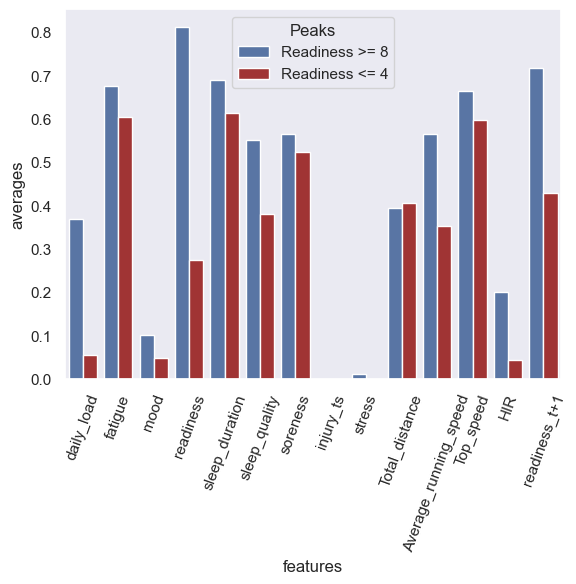

In [91]:
columnNames = ["daily_load", "fatigue", "mood", "readiness", "sleep_duration", "sleep_quality", "soreness", "injury_ts", "stress", "Total_distance", "Average_running_speed", "Top_speed", "HIR", "readiness_t+1"]
df_a_test = df.loc[df['player_name_x'] == playersA[13]].reset_index(drop=True)
df_scaled = df_a_test[columnNames]
df_low =  df_scaled.loc[df_scaled['readiness'] < 5]
df_high = df_scaled.loc[df_scaled['readiness'] > 7]
df_scalar = MinMaxScaler()
#df_scaled[["daily_load"]] = df_scalar.fit_transform(df_scaled[["daily_load"]])*10
df_scaled = pd.DataFrame(df_scalar.fit_transform(df_scaled), columns=columnNames)
df_low = pd.DataFrame(df_scalar.transform(df_low), columns=columnNames)
df_high = pd.DataFrame(df_scalar.transform(df_high), columns=columnNames)
df_high

df_low_high_average = pd.DataFrame(data=[df_high.mean(), df_low.mean()], columns=columnNames)

sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")

row1 = df_low_high_average.loc[0].values.flatten().tolist()
row2 = df_low_high_average.loc[1].values.flatten().tolist()
all_rows = row1+row2
idx = list(range(0,len(columnNames)))+list(range(0,len(columnNames)))
clm = list(df_low.columns)+list(df_low.columns)

df_results = pd.DataFrame()
df_results["averages"] = all_rows
df_results["idx"] = idx
df_results["features"] = clm
df_results["Peaks"] = ["Readiness >= 8"]*len(columnNames)+["Readiness <= 4"]*len(columnNames)
ax = sns.barplot(x = "features", y = "averages", hue = "Peaks", data = df_results, width=0.8, palette=["b", "firebrick"])
plt.xticks(rotation=70)

## Team A and B Distribution Plots Before imputation

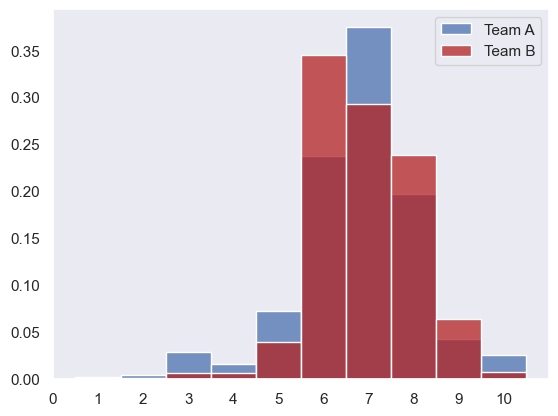

In [134]:
df = createDataset()
df = addReadinessLag_rework(df, 1)
#df = to_sessions(df)


sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")

df_A = df.loc[df['Team_name'] == "TeamA"]
df_B = df.loc[df['Team_name'] == "TeamB"]

histPlot = sns.histplot(data=df_A, x="readiness", discrete=True, stat='probability', color="b", label="Team A")
histPlot = sns.histplot(data=df_B, x="readiness", discrete=True, stat='probability', color="firebrick", label="Team B")
histPlot.set(xlabel=None)
histPlot.set(ylabel=None)
histPlot.set_xticks(range(11))
#histPlot.set_title('Distributions of readiness for Team A and Team B')
histPlot.legend()

[Text(0, 0.5, '')]

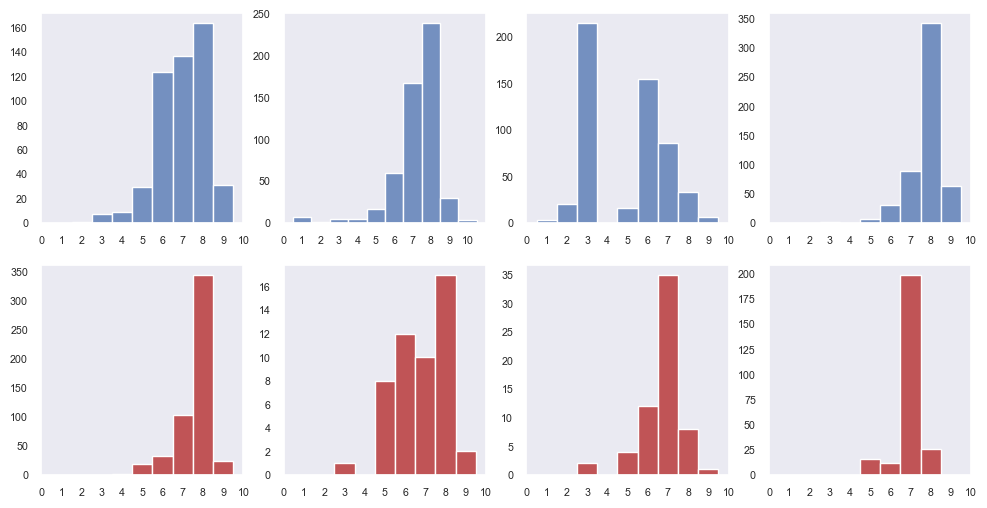

In [135]:
players_A = list(df_A['player_name_x'].unique())
players_B = list(df_B['player_name_x'].unique())
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth": 1})

fig,axs = plt.subplots(2,4, figsize = (12,6))

#fig.suptitle('Distribution of readiness for 4 random players from both Team A and Team B', fontsize=16)

histplot1 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[0]], discrete=True, x="readiness", color="b", ax=axs[0, 0])
histplot2 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[4]], discrete=True, x="readiness", color="b", ax=axs[0, 1])
histplot3 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[6]], discrete=True, x="readiness", color="b", ax=axs[0, 2])
histplot4 = sns.histplot(data=df.loc[df['player_name_x'] == players_A[8]], discrete=True, x="readiness", color="b", ax=axs[0, 3])

histplot9 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[0]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 0])
histplot10 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[19]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 1])
histplot11 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[18]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 2])
histplot12 = sns.histplot(data=df.loc[df['player_name_x'] == players_B[13]], discrete=True, x="readiness", color="firebrick", ax=axs[1, 3])

histplot1.set_xticks(range(11))
histplot1.set(xlabel=None)
histplot1.set(ylabel=None)

histplot2.set_xticks(range(11))
histplot2.set(xlabel=None)
histplot2.set(ylabel=None)


histplot3.set_xticks(range(11))
histplot3.set(xlabel=None)
histplot3.set(ylabel=None)

histplot4.set_xticks(range(11))
histplot4.set(xlabel=None)
histplot4.set(ylabel=None)

histplot9.set_xticks(range(11))
histplot9.set(xlabel=None)
histplot9.set(ylabel=None)

histplot10.set_xticks(range(11))
histplot10.set(xlabel=None)
histplot10.set(ylabel=None)

histplot11.set_xticks(range(11))
histplot11.set(xlabel=None)
histplot11.set(ylabel=None)

histplot12.set_xticks(range(11))
histplot12.set(xlabel=None)
histplot12.set(ylabel=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'daily_load'),
  Text(1, 0, 'fatigue'),
  Text(2, 0, 'mood'),
  Text(3, 0, 'readiness'),
  Text(4, 0, 'sleep_duration'),
  Text(5, 0, 'sleep_quality'),
  Text(6, 0, 'soreness'),
  Text(7, 0, 'injury_ts'),
  Text(8, 0, 'stress'),
  Text(9, 0, 'Total_distance'),
  Text(10, 0, 'Average_running_speed'),
  Text(11, 0, 'Top_speed'),
  Text(12, 0, 'HIR'),
  Text(13, 0, 'readiness_t+1')])

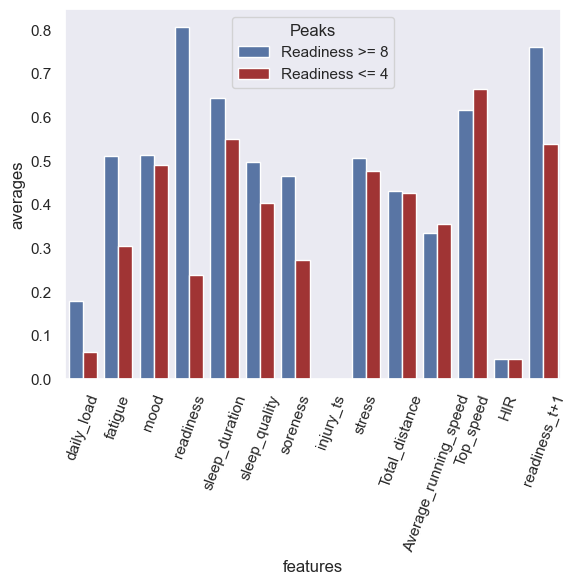

In [136]:
columnNames = ["daily_load", "fatigue", "mood", "readiness", "sleep_duration", "sleep_quality", "soreness", "injury_ts", "stress", "Total_distance", "Average_running_speed", "Top_speed", "HIR", "readiness_t+1"]
df_scaled = df_B[columnNames]
df_low =  df_scaled.loc[df_scaled['readiness'] < 5]
df_high = df_scaled.loc[df_scaled['readiness'] > 7]
df_scalar = MinMaxScaler()
#df_scaled[["daily_load"]] = df_scalar.fit_transform(df_scaled[["daily_load"]])*10
df_scaled = pd.DataFrame(df_scalar.fit_transform(df_scaled), columns=columnNames)
df_low = pd.DataFrame(df_scalar.transform(df_low), columns=columnNames)
df_high = pd.DataFrame(df_scalar.transform(df_high), columns=columnNames)
df_high

df_low_high_average = pd.DataFrame(data=[df_high.mean(), df_low.mean()], columns=columnNames)

sns.set_theme()
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
sns.set_palette("deep")

row1 = df_low_high_average.loc[0].values.flatten().tolist()
row2 = df_low_high_average.loc[1].values.flatten().tolist()
all_rows = row1+row2
idx = list(range(0,len(columnNames)))+list(range(0,len(columnNames)))
clm = list(df_low.columns)+list(df_low.columns)

df_results = pd.DataFrame()
df_results["averages"] = all_rows
df_results["idx"] = idx
df_results["features"] = clm
df_results["Peaks"] = ["Readiness >= 8"]*len(columnNames)+["Readiness <= 4"]*len(columnNames)
ax = sns.barplot(x = "features", y = "averages", hue = "Peaks", data = df_results, width=0.8, palette=["b", "firebrick"])
plt.xticks(rotation=70)

In [120]:
df.loc[df['injury_ts'] ==1].count()
df_ = df.loc[df['readiness_t+1'] > 6]
df_.loc[df_['injury_ts'] ==1].count()

player_name_x            4
daily_load               4
fatigue                  4
mood                     4
readiness                4
sleep_duration           4
sleep_quality            4
soreness                 4
stress                   4
injury_ts                4
weekly_load              4
Team_name                4
Duration                 4
Total_distance           4
Average_running_speed    4
Top_speed                4
Metabolic_power          4
HIR                      4
date                     4
day                      4
month                    4
readiness_t+1            4
readiness_t+2            4
readiness_t+3            4
daysSinceLastSession     4
match                    4
dtype: int64

In [113]:
df_low.loc[df_high['injury_ts'] ==1].count()

daily_load               0
fatigue                  0
mood                     0
readiness                0
sleep_duration           0
sleep_quality            0
soreness                 0
injury_ts                0
stress                   0
Total_distance           0
Average_running_speed    0
Top_speed                0
HIR                      0
readiness_t+1            0
dtype: int64

In [26]:
from scipy.stats import norm
from scipy.special import rel_entr

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [204]:

test = pd.DataFrame()
test["distribution"] = df.readiness.value_counts(normalize=True).sort_index(ascending=False)

sessions = to_sessions(df)
test2 = pd.DataFrame()
test2["distribution"] = sessions.readiness.value_counts(normalize=True).sort_index(ascending=False)
sessions = list(sessions.readiness.value_counts(normalize=True).sort_index(ascending=False))
sessions.append(0)


P = list(df.readiness.value_counts(normalize=True).sort_index(ascending=False))
Q = sessions
print(P)
print(Q)

sum(rel_entr(Q, P))

[0.018622391743325105, 0.05081893650437514, 0.2133722234687009, 0.3421023109715055, 0.2798407000224366, 0.05900830154812654, 0.012059681400044873, 0.019407673322862914, 0.00297285169396455, 0.0017949293246578416]
[0.025514519312094728, 0.07076402593741189, 0.27473921623907527, 0.33718635466591484, 0.24894276853679165, 0.03354947843247815, 0.0060614603890611785, 0.00281928390188892, 0.00042289258528333803, 0]


c:\Users\Sagba\OneDrive\Master subjects\masterThesisCode\PMSysPrediction\pmsys-internal\mathias-menkerud-sagbakken\new_main\utility\xgboost_framework.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = pd.to_timedelta(df['Duration']).dt.total_seconds()
c:\Users\Sagba\OneDrive\Master subjects\masterThesisCode\PMSysPrediction\pmsys-internal\mathias-menkerud-sagbakken\new_main\utility\xgboost_framework.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match'] = 0


0.03752899142973758

C:\Users\Sagba\AppData\Local\Temp\ipykernel_1364\1358620774.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


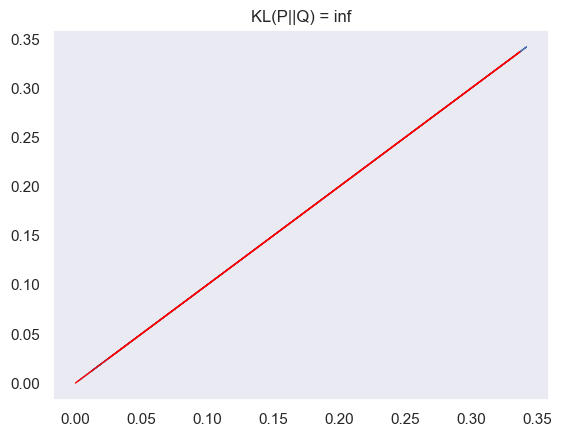

In [214]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(np.array(P), np.array(Q)))
plt.plot(P, P)
plt.plot(Q, Q, c='red')

In [36]:
config1 = pd.read_pickle("BASELINE_results/data/classification-confgi1")
config2 = pd.read_pickle("BASELINE_results/data/classification-confgi2")
config3 = pd.read_pickle("BASELINE_results/data/classification-confgi3")

config4 = pd.read_pickle("BASELINE_results/data/classification-sessions-confgi1")
config5 = pd.read_pickle("BASELINE_results/data/classification-sessions-confgi2")
config6 = pd.read_pickle("BASELINE_results/data/classification-sessions-confgi3")

config4

,ridge,rocket,xgboost,dummy,lstm
0,0.522167,0.527094,0.551724,0.443350,0.574879
1,0.523895,0.505250,0.549252,0.272365,0.573329


In [37]:
config5

,ridge,rocket,xgboost,dummy,lstm
0,0.348039,0.450980,0.401961,0.259804,0.375000
1,0.323820,0.407836,0.387977,0.107156,0.363308


In [38]:
config6

,ridge,rocket,xgboost,dummy,lstm
0,0.676471,0.632353,0.691176,0.436275,0.649038
1,0.676161,0.632085,0.694313,0.265040,0.647462
